###### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Coke-Mentos Car

This [IPython notebook](http://ipython.org/notebook.html) demonstrates the use of mass, momentum, and energy balances to analysis the performance of a toy car driven by the well-known Coke-Mentos phenomenon.

In [1]:
%matplotlib inline
from pylab import *

## Background

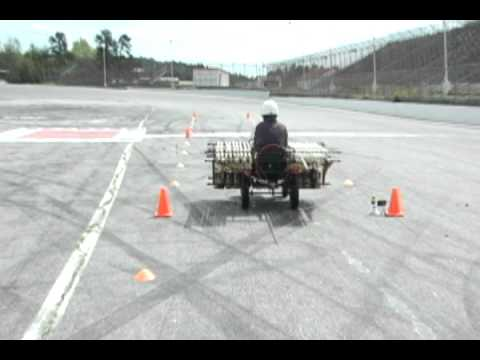

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("g9DVuMtbsvo",560,315,rel=0)

## Model: Foam jet

We assume that Mentos provides enough nucleation sites for the dissolved CO<sub>2</sub> to release from solution to produce a foam that is ejected from the nozzle as a jet.
The composition of the mixture will remain constant, but the pressure and density of the foam decrease as the foam is depleted from the reservoir. In principle we could solve do a material balance under the assumption of vapor-liquid equilibrium. But to keep things simple, we'll take a short-cut and assume a particular form for the relatonship.

<img src = "https://raw.github.com/jckantor/CBE20255/master/images/coke-mentos-car.png" style = "height:200px" />

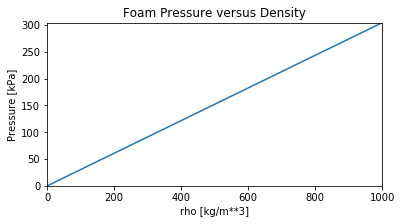

In [4]:
P_atm = 101325.0             # Atmospheric pressure   N/m**2
P_initial = 3*P_atm          # Initial pressure in the bottle
rho_initial = 1000           # Initial foam density kg/m**3
rho_final = 200              # Foam density at atmospheric pressure, determine expt'l.  kg/m**3

def Pb(rho):
    return rho*P_initial/rho_initial

rho = linspace(0,1000)        # kg/m**3

rcParams['figure.figsize'] = 6,3

plot(rho,[Pb(rho)/1000.0 for rho in rho])
axis([0,1000,0,3*101.325])
ylabel('Pressure [kPa]')
xlabel('rho [kg/m**3]')
title('Foam Pressure versus Density')

### Mass, Momentum, and Energy Balances

#### Mass Balance

Mass balance where $b$ refers to conditions in the bottle, and $a$ to conditions at the nozzle exit.

$$V_b\frac{d\rho_b}{dt} = -\rho_a v_{a} A $$

#### Momentum Balance

Momentum balance where $m_c$ refers to the mass of the car not including the fluid contents of the bottle.

$$ (m_c + m_b)\frac{d v_c}{dt} = \rho_a v_{a}^2A $$

#### [Bernoulli's principle](http://en.wikipedia.org/wiki/Bernoulli's_principle) applied to the incompressible flow of the liquid.

For a [compressible flow](http://en.wikipedia.org/wiki/Bernoulli's_principle#Compressible_flow_in_fluid_dynamics), Bernoulli's principle gives us

$$\frac{v_a^2}{2} + \int_{P_b}^{P_a} \frac{dP}{\rho(P)} = \mbox{constant}$$

on any streamline. Assuming that the volume of CO<sub>2</sub> far exceeds the water, then to a rough 
approximation $\rho(P) = \rho_{water}\frac{P}{P_{initial}}$. This leaves us with an equation

$$\frac{v_a^2}{2} = \frac{P_{initial}}{\rho_{water}} \ln \frac{P_b}{P_a}$$

### Sample Calculations

In [9]:
from scipy.integrate import odeint
import numpy as np

A_nozzle = 3.14*(0.0105)**2            # m**2
vol_b = 2.0/1000                       # m**3
m_car = 2.0                            # kg

def dX(X,t):
    rho, vel, pos = X
    m_b = rho*vol_b
    Pb = P_initial*rho/rho_initial
    if Pb > P_atm:
        vel_a = sqrt(2*(P_initial/rho_initial)*log(Pb/P_atm))
    else:
        vel_a = 0.0
    deriv_rho = -rho_final*A_nozzle*vel_a/vol_b
    deriv_vel = rho_final*vel_a*vel_a*A_nozzle/(m_car + vol_b*rho)
    deriv_pos = vel
    return [deriv_rho,deriv_vel,deriv_pos]

t = linspace(0,2.0,1000)
soln = odeint(dX,[1000.0,0.0,0.0],t)

rho = soln.T[0]
vel = soln.T[1]
pos = soln.T[2]
mass = m_car + vol_b*rho
Pb = rho*P_initial/rho_initial
va = np.sqrt(amax(zip(zeros(len(Pb)),2*(P_initial/rho_initial)*log(Pb/P_atm))))

rcParams['figure.figsize'] = 8,12

subplot(4,1,1)
plot(t,rho)
xlabel('Time [s]')
legend(['Density [kg/m**3]'])
axis([0,t[-1],0,1000])

subplot(4,1,2)
plot(t,vel)
plot(t,pos)
xlabel('Time [s]')
legend(['Velocity [m/s]','Position [m]'],loc = 'upper left')

subplot(4,1,3)
plot(t,mass)
xlabel('Time [sec]')
legend(['Mass [kg]'])
axis([0,t[-1],0,mass[0]])

subplot(4,1,4)
plot(t,va)
xlabel('Time [sec]')
legend(['Nozzle Velocity [m/s]'])

AttributeError: 'zip' object has no attribute 'sqrt'